In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

1.1.1
1.1.1


<ipython-input-1-c8c2b1a88844>:40: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
          })


READING TABLES

In [3]:
#
# Reading get_proc_elines table!
# 
get_proc_elines="tables/get_proc_elines_MaNGA.clean.csv"
col_proc_elines=header_columns(get_proc_elines,2)
tab_pe=ascii.read(get_proc_elines, delimiter=',', guess=True, comment='\s*#', names=col_proc_elines,\
                      fill_values=[('BAD', np.nan)])
list_columns(tab_pe.columns)

MaNGA_name                          log_Mass_gas                        e_OH_Re_fit_dop                     ZH_T50                              
nsa_redshift                        log_Mass_gas_Re                     alpha_OH_Re_fit_dop                 ZH_Re_T50                           
nsa_u_absmag                        log_Mass_gas_Av_ssp_ZH              e_alpha_OH_Re_fit_dop               a_ZH_T50                            
nsa_z_absmag                        log_Mass_gas_Av_ssp                 cc_r_OH_dop                         T60                                 
nsa_u_z_absmag                      log_Mass_gas_Av_gas_rad             sig_r_OH_dop                        ZH_T60                              
nsa_mstar                           log_Mass_stars_sigma                NO_Re_fit_EPM09                     ZH_Re_T60                           
nsa_inclination                     log_F_Ha                            e_NO_Re_fit_EPM09                   a_ZH_T60              

In [4]:
#
# Reading Mag table
#
get_mag_cubes="tables/get_mag_cubes_v3_1_1_redshift.csv"
col_mag_cubes=header_columns_space(get_mag_cubes,2)
tab_mag=ascii.read(get_mag_cubes, delimiter=',', guess=True, comment='\s*#', names=col_mag_cubes,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)
tab_mag.rename_column('name-obj', 'name')
list_columns(col_mag_cubes)


name-obj                   i_band_mag_error           Y_centroid                 SN_at_R50                  
redshift                   i_band_abs_mag             Re                         error_SN_at_R50            
error_redshift             i_band_abs_mag_error       error_Re                   Re1                        
u_band_mag                 B_band_mag                 mean_S/N_at_Re             error_Re1                  
u_band_mag_error           B_band_mag_error           sigma_S/N_at_Re            B-V                        
u_band_abs_mag             B_band_abs_mag             ellipticy                  error_B-V                  
u_band_abs_mag_error       B_band_abs_mag_error       Pa                         B-R                        
g_band_mag                 V_band_mag                 R50                        error_B-R                  
g_band_mag_error           V_band_mag_error           error_R50                  log10_Mass/Msun_phot.      
g_band_abs_mag     

In [5]:
#
# Reading Indices at Re
#
get_ind_Re="tables/get_val_ind_Re_MaNGA.csv"
col_ind_Re=header_columns_space(get_ind_Re,2)
tab_ind_Re=ascii.read(get_ind_Re, delimiter=',', guess=True, comment='\s*#', names=col_ind_Re,\
                      fill_values=[('BAD', np.nan)])
#print(tab_ind_Re)
tab_ind_Re.rename_column('MaNGA_name', 'name')
list_columns(tab_ind_Re.columns)


name        Mgb         e_Fe5335    Hg          
Hd          e_Mgb       e4000       e_Hg        
e_Hd        Fe5270      e_e4000     SN          
Hb          e_Fe5270    Hdmod       e_SN        
e_Hb        Fe5335      e_Hdmod                 


In [6]:
#
# Reading Indices at Re
#
get_ind="tables/get_proc_indices_MaNGA.clean.csv"
col_ind=header_columns_space(get_ind,2)
tab_ind=ascii.read(get_ind, delimiter=',', guess=True, comment='\s*#', names=col_ind,\
                      fill_values=[('BAD', np.nan)])
#print(tab_ind_Re)
#tab_ind_Re.rename_column('MaNGA_name', 'name')
list_columns(tab_ind.columns)


MaNGA_name            e_D4000_fit           e_Hb_Re_fit           e_D4000_Re_fit        
nsa_redshift          slope_D4000           Hb_alpha_fit          D4000_alpha_fit       
nsa_u_absmag          e_slope_D4000         e_Hb_alpha_fit        e_D4000_alpha_fit     
nsa_z_absmag          D4000_OH_fit          Mgb_Re_fit            Hdmod_Re_fit          
nsa_u_z_absmag        e_D4000_fit1          e_Mgb_Re_fit          e_Hdmod_Re_fit        
nsa_mstar             slope_D4000_OH        Mgb_alpha_fit         Hdmod_alpha_fit       
nsa_inclination       e_slope_D4000_OH      e_Mgb_alpha_fit       e_Hdmod_alpha_fit     
nsa_petro_th50        Sgas_OH_fit           Fe5270_Re_fit         Hg_Re_fit             
nsa_sersic_ba         e_Sgas_fit            e_Fe5270_Re_fit       e_Hg_Re_fit           
nsa_sersic_n          slope_Sgas_OH         Fe5270_alpha_fit      Hg_alpha_fit          
nsa_sersic_phi        e_slope_Sgas          e_Fe5270_alpha_fit    e_Hg_alpha_fit        
nsa_sersic_th50      

In [7]:
#
# Reading Indices at Re
#
get_Re="tables/get_val_Re_MaNGA.csv"
col_Re=header_columns_space(get_Re,2)
tab_val_Re=ascii.read(get_Re, delimiter=',', guess=True, comment='\s*#', names=col_Re,\
                      fill_values=[('BAD', np.nan)])
#print(tab_ind_Re)
tab_val_Re.rename_column('MaNGA_name', 'name')
list_columns(tab_val_Re.columns)


name                    e_Age_LW                e_disp_Ha               e_ML                    
Sigma_Mass_stars        Age_MW                  vel_Ha                  Sigma_SFR_ssp           
e_Sigma_Mass_stars      e_Age_MW                e_vel_Ha                e_Sigma_SFR_ssp         
Sigma_SFR               OH_t2                   vel_ssp                 Sigma_Mass_gas_rad      
e_Sigma_SFR             e_OH_t2                 e_vel_ssp               e_Sigma_Mass_gas_rad    
Sigma_Mass_gas          OH_O3N2                 SK_ssp                  Lambda                  
e_Sigma_Mass_gas        e_OH_O3N2               e_SK_ssp                e_Lambda                
Sigma_Mass_gas_ssp      Av_gas                  SK_Ha                   OH_ONS                  
e_Sigma_Mass_gas_ssp    e_Av_gas                e_SK_Ha                 e_OH_ONS                
ZH_LW                   Av_ssp                  KIN_ssp                 NO_ONS                  
e_ZH_LW                 e_Av_s

In [8]:
#
# Reading Indices at Re
#
get_in_Re="tables/get_val_within_Re_MaNGA.csv"
col_in_Re=header_columns_space(get_in_Re,2)
tab_val_in_Re=ascii.read(get_in_Re, delimiter=',', guess=True, comment='\s*#', names=col_in_Re,\
                      fill_values=[('BAD', np.nan)])
list_col_names=tab_val_in_Re.columns.copy()
for col_name in list_col_names:
    new_col_name="in_"+col_name
    tab_val_in_Re.rename_column(col_name, new_col_name)
#print(tab_ind_Re)
tab_val_in_Re.rename_column('in_MaNGA_name', 'name')
list_columns(tab_val_in_Re.columns)


name                       in_e_Age_LW                in_e_disp_Ha               in_e_ML                    
in_Sigma_Mass_stars        in_Age_MW                  in_vel_Ha                  in_Sigma_SFR_ssp           
in_e_Sigma_Mass_stars      in_e_Age_MW                in_e_vel_Ha                in_e_Sigma_SFR_ssp         
in_Sigma_SFR               in_OH_t2                   in_vel_ssp                 in_Sigma_Mass_gas_rad      
in_e_Sigma_SFR             in_e_OH_t2                 in_e_vel_ssp               in_e_Sigma_Mass_gas_rad    
in_Sigma_Mass_gas          in_OH_O3N2                 in_SK_ssp                  in_Lambda                  
in_e_Sigma_Mass_gas        in_e_OH_O3N2               in_e_SK_ssp                in_e_Lambda                
in_Sigma_Mass_gas_ssp      in_Av_gas                  in_SK_Ha                   in_OH_ONS                  
in_e_Sigma_Mass_gas_ssp    in_e_Av_gas                in_e_SK_Ha                 in_e_OH_ONS                
in_ZH_LW           

In [9]:
#
# Reading flux_elines_table
#
get_p_fe="tables/get_proc_flux_elines_MaNGA.clean.csv"
col_p_fe=header_columns_space(get_p_fe,2)
tab_fe=ascii.read(get_p_fe, delimiter=',', guess=True, comment='\s*#', names=col_p_fe,\
                      fill_values=[('BAD', np.nan)])
print(len(tab_fe))
list_columns(tab_fe.columns)


#tab_mag.rename_column('name-obj', 'name')

10154
MaNGA_name                          e_flux_HI3889.05_alpha_fit          e_flux_[OIII]5006.84_alpha_fit      e_flux_Halpha6562.85_alpha_fit      
nsa_redshift                        flux_HeI3964.73_Re_fit              flux_HeI5015.68_Re_fit              flux_[NII]6583.45_Re_fit            
nsa_u_absmag                        e_flux_HeI3964.73_Re_fit            e_flux_HeI5015.68_Re_fit            e_flux_[NII]6583.45_Re_fit          
nsa_z_absmag                        flux_HeI3964.73_alpha_fit           flux_HeI5015.68_alpha_fit           flux_[NII]6583.45_alpha_fit         
nsa_u_z_absmag                      e_flux_HeI3964.73_alpha_fit         e_flux_HeI5015.68_alpha_fit         e_flux_[NII]6583.45_alpha_fit       
nsa_mstar                           flux_[NeIII]3967.46_Re_fit          flux_[NI]5197.9_Re_fit              flux_[SII]6716.44_Re_fit            
nsa_inclination                     e_flux_[NeIII]3967.46_Re_fit        e_flux_[NI]5197.9_Re_fit            e_flux_[SII]6716

In [10]:
#
# Reading flux_elines_table
#
get_p_fe_org="tables/get_proc_flux_elines_org_MaNGA.clean.csv"
col_p_fe_org=header_columns_space(get_p_fe_org,2)
tab_fe_org=ascii.read(get_p_fe_org, delimiter=',', guess=True, comment='\s*#', names=col_p_fe_org,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)
#tab_mag.rename_column('name-obj', 'name')
#list_columns(col_p_fe_org)
print(len(tab_fe_org))
list_columns(tab_fe_org.columns)


#tab_mag.rename_column('name-obj', 'name')

10156
MaNGA_name                           EW_[SII]4076_Re_fit                  e_disp_[OIII]4958_Re_fit             l_flux_[SIII]6312_Ha_alpha_fit       
nsa_redshift                         e_EW_[SII]4076_Re_fit                disp_[OIII]4958_alpha_fit            e_l_flux_[SIII]6312_Ha_alpha_fit     
nsa_u_absmag                         EW_[SII]4076_alpha_fit               e_disp_[OIII]4958_alpha_fit          l_flux_SiII6347_Ha_Re_fit            
nsa_z_absmag                         e_EW_[SII]4076_alpha_fit             disp_Hb4861_Re_fit                   e_l_flux_SiII6347_Ha_Re_fit          
nsa_u_z_absmag                       EW_Hd4101_Re_fit                     e_disp_Hb4861_Re_fit                 l_flux_SiII6347_Ha_alpha_fit         
nsa_mstar                            e_EW_Hd4101_Re_fit                   disp_Hb4861_alpha_fit                e_l_flux_SiII6347_Ha_alpha_fit       
nsa_inclination                      EW_Hd4101_alpha_fit                  e_disp_Hb4861_alpha_fit   

In [11]:
#
# Reading flux_elines_table
#
get_p_OH="tables/get_proc_OH_MaNGA.clean.csv"
col_p_OH=header_columns_space(get_p_OH,2)
tab_OH=ascii.read(get_p_OH, delimiter=',', guess=True, comment='\s*#', names=col_p_OH,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)
#tab_mag.rename_column('name-obj', 'name')
#list_columns(col_p_fe_org)
print(len(tab_OH))
list_columns(tab_OH.columns)


#tab_mag.rename_column('name-obj', 'name')

10226
MaNGA_name                      e_OH_Pet04_O3N2_alpha_fit       e_OH_Cur20_R2_alpha_fit         e_U_Dors_O32_alpha_fit          
nsa_redshift                    OH_Kew02_N2O2_Re_fit            OH_Cur20_N2_Re_fit              U_Dors_S_Re_fit                 
nsa_u_absmag                    e_OH_Kew02_N2O2_Re_fit          e_OH_Cur20_N2_Re_fit            e_U_Dors_S_Re_fit               
nsa_z_absmag                    OH_Kew02_N2O2_alpha_fit         OH_Cur20_N2_alpha_fit           U_Dors_S_alpha_fit              
nsa_u_z_absmag                  e_OH_Kew02_N2O2_alpha_fit       e_OH_Cur20_N2_alpha_fit         e_U_Dors_S_alpha_fit            
nsa_mstar                       OH_Pil10_ONS_Re_fit             OH_Cur20_R23_Re_fit             U_Mor16_O23_fs_Re_fit           
nsa_inclination                 e_OH_Pil10_ONS_Re_fit           e_OH_Cur20_R23_Re_fit           e_U_Mor16_O23_fs_Re_fit         
nsa_petro_th50                  OH_Pil10_ONS_alpha_fit          OH_Cur20_R23_alpha_fit     

In [12]:
#
# Reading morphological table
#
#morph={'-2':'CD','-1':'E','0':'S0','1':'Sa','2':'Sab','3':'Sb','4':'Sbc','5':'Sc','6':'Scd',\
#       '7':'Sd','8':'Sdm','9':'Sm','10':'Irr'}
morph={-2:'CD',-1:'E',0:'S0',1:'Sa',2:'Sab',3:'Sb',4:'Sbc',5:'Sc',6:'Scd',\
       7:'Sd',8:'Sdm',9:'Sm',10:'Irr'}
morph_file="tables/manga-morphall-v3_1_1.fits"
tab_morph = Table.read(morph_file, format='fits')
tab_morph.rename_column('index', 'name')
tab_morph.rename_column('nsa_sersic_n', 'nsa_sersic_n_morph')
list_columns(tab_morph.columns)
print(morph)


name                  r-i                   P(Sab)                P(Sm)                 
nsa_sersic_n_morph    i-z                   P(Sb)                 P(Irr)                
log_Mass_corr         C (R50/R90)           P(Sbc)                best type_n           
rat_vel_sigma         P(CD)                 P(Sc)                 best type             
Ellipticity           P(E)                  P(Scd)                                      
u-g                   P(S0)                 P(Sd)                                       
g-r                   P(Sa)                 P(Sdm)                                      
{-2: 'CD', -1: 'E', 0: 'S0', 1: 'Sa', 2: 'Sab', 3: 'Sb', 4: 'Sbc', 5: 'Sc', 6: 'Scd', 7: 'Sd', 8: 'Sdm', 9: 'Sm', 10: 'Irr'}


In [13]:
drpall='tables/drpall-v3_1_1.fits'
tab_dr = Table.read(drpall, format='fits')
tab_dr['name']=tab_dr['plateifu']
for indx,val in enumerate(tab_dr['name']):
    tab_dr['name'][indx]='manga-'+tab_dr['name'][indx]
list_columns(tab_dr.columns)
print(tab_dr['name'])

plate                    cartid                   manga_tileid             nsa_nsaid                
ifudsgn                  designid                 nsa_iauname              nsa_nsaid_v1b            
plateifu                 cenra                    ifudesignsize            nsa_z                    
mangaid                  cendec                   ifutargetsize            nsa_zdist                
versdrp2                 airmsmin                 ifudesignwrongsize       nsa_sersic_absmag        
versdrp3                 airmsmed                 z                        nsa_elpetro_absmag       
verscore                 airmsmax                 zmin                     nsa_elpetro_amivar       
versutil                 seemin                   zmax                     nsa_sersic_mass          
versprim                 seemed                   szmin                    nsa_elpetro_mass         
platetyp                 seemax                   szmax                    nsa_elpetro_ba  

In [14]:
#
# Joininig all tables
#
tab_mag['u-i']=tab_mag['u_band_mag']-tab_mag['i_band_mag']
tab_all=join(tab_pe,tab_mag,keys=['name'],join_type='left')
print("get_proc and get_mag joint")
tab_all=join(tab_all,tab_morph,keys=['name'],join_type='left')
print("... morph added")
tab_all=join(tab_all,tab_dr,keys=['name'],join_type='left')
print("... DR added")
tab_fe.remove_columns(['MaNGA_name','nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                       'nsa_sersic_phi','nsa_sersic_th50'])
tab_all=join(tab_all,tab_fe,keys=['name'],join_type='left')
print("... flux_elines_long added")
tab_fe_org.remove_columns(['MaNGA_name','nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                           'nsa_sersic_phi','nsa_sersic_th50'])
tab_all=join(tab_all,tab_fe_org,keys=['name'],join_type='left')
print("... flux_elines org added")
tab_OH.remove_columns(['MaNGA_name','nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                       'nsa_sersic_phi','nsa_sersic_th50','nsa_redshift', 'nsa_u_absmag',\
                       'nsa_z_absmag', 'nsa_u_z_absmag', 'nsa_mstar', 'nsa_inclination'])
tab_all=join(tab_all,tab_OH,keys=['name'],join_type='left')
print("... OH added")
tab_all=join(tab_all,tab_ind_Re,keys=['name'],join_type='left')
print("... Indices at Re added")
tab_ind.remove_columns(['MaNGA_name','nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                       'nsa_sersic_phi','nsa_sersic_th50','nsa_redshift', 'nsa_u_absmag',\
                       'nsa_z_absmag', 'nsa_u_z_absmag', 'nsa_mstar', 'nsa_inclination'])
tab_all=join(tab_all,tab_ind,keys=['name'],join_type='left')
print("... Indices fitted added")
tab_all=join(tab_all,tab_val_Re,keys=['name'],join_type='left')
print("... Values at Re added")
tab_all=join(tab_all,tab_val_in_Re,keys=['name'],join_type='left')
print("... Values in Re added")

#tab_all([data[n].filled(np.nan) for n in data.colnames])


get_proc and get_mag joint
... morph added
... DR added
... flux_elines_long added
... flux_elines org added
... OH added
... Indices at Re added
... Indices fitted added
... Values at Re added
... Values in Re added


In [15]:
list_columns(tab_all.columns,5)

MaNGA_name                           ZH_T99                               flux_[NeIII]3869_Re_fit              disp_HeI4026_alpha_fit               l_flux_[FeII]4287_Hb_Re_fit          
nsa_redshift_1                       ZH_Re_T99                            e_flux_[NeIII]3869_Re_fit            e_disp_HeI4026_alpha_fit             e_l_flux_[FeII]4287_Hb_Re_fit        
nsa_u_absmag_1                       a_ZH_T99                             flux_[NeIII]3869_alpha_fit           disp_[SII]4069_Re_fit                l_flux_[FeII]4287_Hb_alpha_fit       
nsa_z_absmag_1                       log_Mass_gas_Av_gas_OH               e_flux_[NeIII]3869_alpha_fit         e_disp_[SII]4069_Re_fit              e_l_flux_[FeII]4287_Hb_alpha_fit     
nsa_u_z_absmag_1                     log_Mass_gas_Av_ssp_OH               flux_H83889_Re_fit                   disp_[SII]4069_alpha_fit             l_flux_[FeII]4319_Hb_Re_fit          
nsa_mstar_1                          lSFR_NO_CEN                      

(8.0, 13.0)

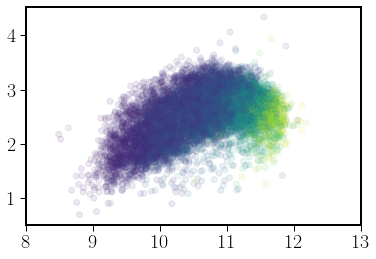

In [23]:
#in_Sigma_Mass_stars  
plt.scatter(tab_all['log_Mass'],tab_all['in_Sigma_Mass_stars'],c=tab_all['z_stars'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(8,13)

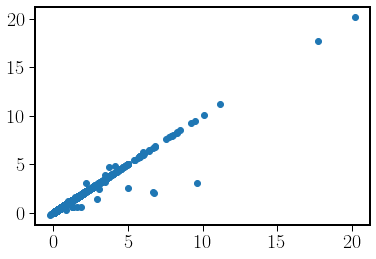

In [31]:
#list_columns(tab_all.columns)
plt.scatter(tab_all['flux_Halpha6562.85_Re_fit'],tab_all['flux_Ha6562_Re_fit']) #flux_Ha6562_Re_fit

-0.025555095377289037


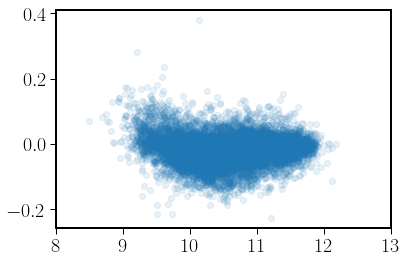

In [39]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['log_Mass'],tab_all['OH_Mar13_O3N2_alpha_fit'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(8,13)
print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

-0.025555095377289037


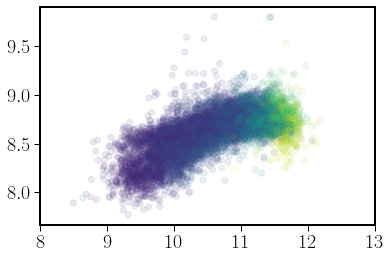

In [25]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['log_Mass'],tab_all['OH_Ho_Re_fit'],c=tab_all['z_stars'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(8,13)
print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

(8.0, 13.0)

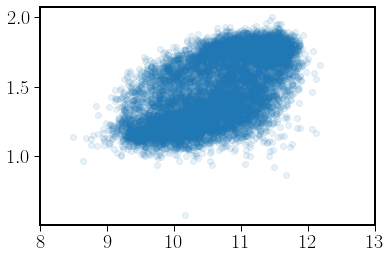

In [13]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['log_Mass'],tab_all['D4000_Re_fit'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(8,13)
#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

(8.0, 13.0)

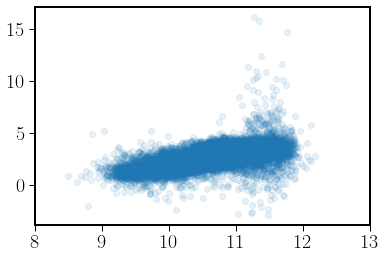

In [13]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['log_Mass'],tab_all['Mgb_Re_fit'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(8,13)
#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

(-5.0, 15.0)

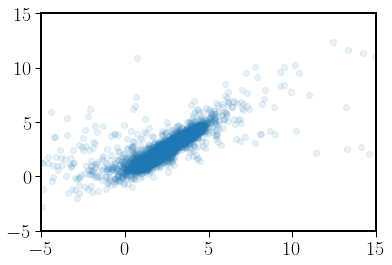

In [15]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['Mgb'],tab_all['Mgb_Re_fit'],alpha=0.1) #flux_Ha6562_Re_fit
plt.xlim(-5,15)
plt.ylim(-5,15)

#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

(-5.0, 10.0)

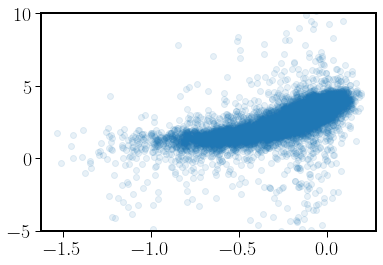

In [18]:
#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
plt.scatter(tab_all['ZH_LW_Re'],tab_all['Mgb'],alpha=0.1) #flux_Ha6562_Re_fit
#plt.xlim(-2,0.5)
plt.ylim(-5,10)
#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

(-1.0, 5.0)

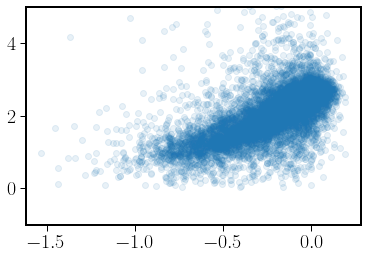

In [25]:
#e_Hd        Fe5270      e_e4000     SN          
#Hb          e_Fe5270    Hdmod       e_SN        
#e_Hb        Fe5335      e_Hdmod           

#list_columns(tab_all.columns) #OH_Pet04_O3N2_alpha_fit
tab_all['Fe']=np.sqrt(tab_all['Fe5270']*tab_all['Fe5335'])
plt.scatter(tab_all['ZH_LW_Re'],tab_all['Fe'],alpha=0.1) #flux_Ha6562_Re_fit
#plt.xlim(-2,0.5)
plt.ylim(-1,5)
#print(np.nanmean(tab_all['OH_Pet04_O3N2_alpha_fit']))

(-1.0, 5.0)

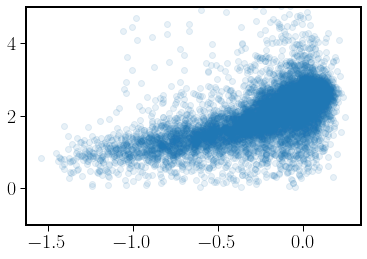

In [28]:
plt.scatter(tab_all['ZH_MW_Re_fit'],tab_all['Fe'],alpha=0.1) #flux_Ha6562_Re_fit
plt.ylim(-1,5)

(-3.0, 10.0)

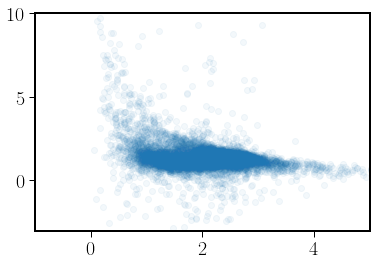

In [37]:
plt.scatter(tab_all['Fe'],tab_all['Mgb']/tab_all['Fe'],alpha=0.05) #flux_Ha6562_Re_fit
plt.xlim(-1,5)
plt.ylim(-3,10)


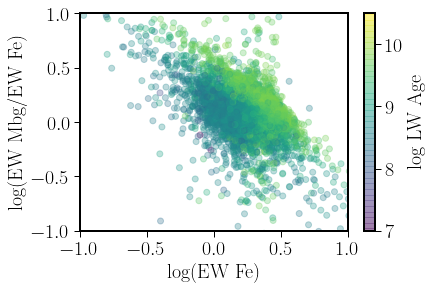

In [62]:
cs=plt.scatter(np.log10(tab_all['Fe']),np.log10(tab_all['Mgb']/tab_all['Fe']),\
            c=tab_all['Age_LW_Re'],alpha=0.3,vmin=7,vmax=10.5) 
#flux_Ha6562_Re_fit
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel(r'log(EW Fe)')
plt.ylabel(r'log(EW Mbg/EW Fe)')
plt.colorbar(cs,label='log LW Age')


(-0.5, 1.0)

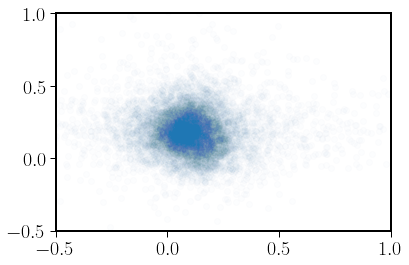

In [90]:
tab_all['OZ_Ho']=tab_all['OH_Ho_Re_fit']-8.67-tab_all['ZH_LW_Re']
tab_all['Mg_Fe']=np.log10(tab_all['Mgb']/tab_all['Fe'])
plt.scatter(tab_all['Mg_Fe'],tab_all['OZ_Ho'],alpha=0.01)
plt.xlim(-0.5,1)
plt.ylim(-0.5,1)


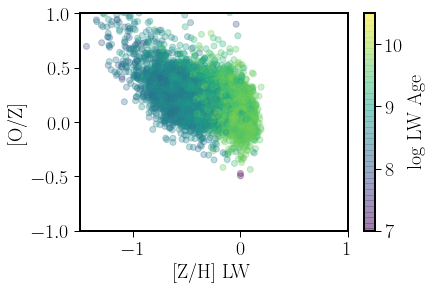

In [91]:
cs=plt.scatter(tab_all['ZH_LW_Re'],tab_all['OZ_Ho'],\
            c=tab_all['Age_LW_Re'],alpha=0.3,vmin=7,vmax=10.5) 
#flux_Ha6562_Re_fit
plt.xlim(-1.5,1)
plt.ylim(-1,1)
plt.xlabel(r'[Z/H] LW')
plt.ylabel(r'[O/Z]')
plt.colorbar(cs,label='log LW Age')


In [125]:
print(tab_all['nsa_sersic_n_morph'])

nsa_sersic_n_morph
------------------
          0.741845
           1.44272
           2.18084
          0.869326
           1.25046
          0.715437
            4.9523
            5.9563
               6.0
           1.86687
               ...
           2.25223
            2.1025
           2.80449
           4.55335
           4.66327
           4.81856
          0.922933
           1.36054
           2.21669
               6.0
           1.26898
Length = 10226 rows


10226


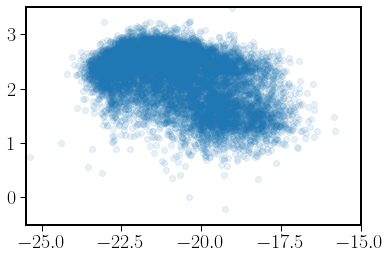

In [127]:
plt.scatter(tab_all['i_band_abs_mag'],tab_all['u-i'],alpha=0.1,edgecolor=None)
plt.xlim(-25.5,-15)
plt.ylim(-0.5,3.5)
print(len(tab_all))
#print(len(tab_mag))


-2
10


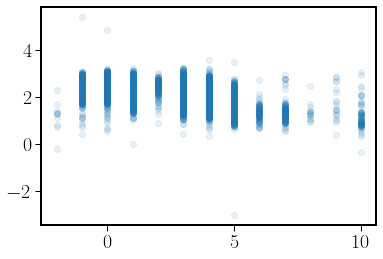

In [128]:
plt.scatter(tab_all['best type_n'],tab_all['u-i'],alpha=0.1,edgecolor=None)
print(np.min(tab_all['best type_n']))
print(np.max(tab_all['best type_n']))
#print(tab_all['best type_n'])
#plt.xlim(-25.5,-15)
#plt.ylim(-0.5,3.5)
#print(len(tab_all))
#print(len(tab_mag))


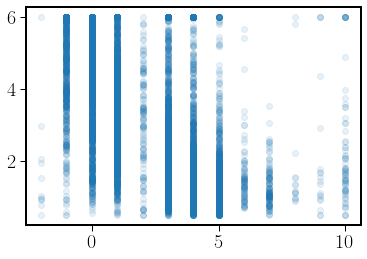

In [130]:
plt.scatter(tab_all['best type_n'],tab_all['nsa_sersic_n_morph'],alpha=0.1,edgecolor=None)
#print(np.min(tab_all['best type_n']))
#print(np.max(tab_all['best type_n']))
#print(tab_all['best type_n'])
#plt.xlim(-25.5,-15)
#plt.ylim(-0.5,3.5)
#print(len(tab_all))
#print(len(tab_mag))
#print(tab_all['nsa_sersic_n'])

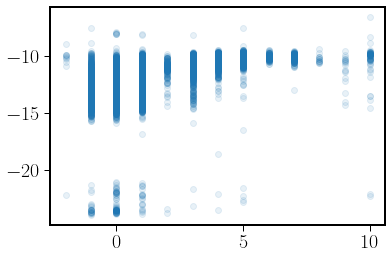

In [131]:
plt.scatter(tab_all['best type_n'],tab_all['lSFR']-tab_all['log_Mass'],alpha=0.1,edgecolor=None)
#print(np.mean(tab_all['log_Mass']))